## Summary

#### Data Cleaning

Average rating by driver has 201 null values. Average rating of driver has 8122 null values. Phone has 396 null values.

Average rating of driver null values can be replaced with the mean average rating of driver value. Reason behind this is because since we are looking for reasons behind user retention, a user can expect to get a driver of the average quality on any given ride.

Average rating by driver null value rows can be dropped. These rows only account for 0.4% of the dataset.

Phone null values are inconsequential. Phone is turned into a binary variable - is_iPhone - to denote whether the phone is an iPhone or not for logistic regression.

#### Data Summary

There are 18,804 active users and 31,196 inactive users.

In [27]:
df.active_six.value_counts()

0    31196
1    18804
Name: active_six, dtype: int64

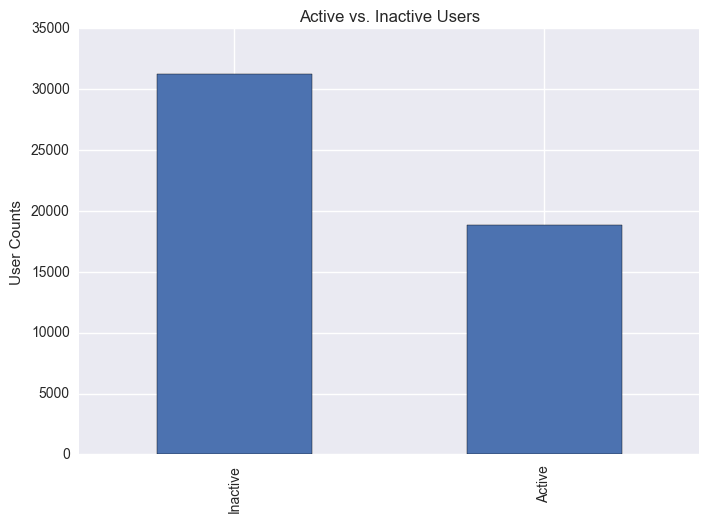

In [25]:
df.active_six.value_counts().plot(kind='bar')
plt.xticks(range(2), ('Inactive', 'Active'))
plt.ylabel("User Counts")
plt.title("Active vs. Inactive Users")
plt.show()

In [2]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

In [4]:
data[0]

{'avg_dist': 3.67,
 'avg_rating_by_driver': 5.0,
 'avg_rating_of_driver': 4.7,
 'avg_surge': 1.1,
 'city': "King's Landing",
 'last_trip_date': '2014-06-17',
 'phone': 'iPhone',
 'signup_date': '2014-01-25',
 'surge_pct': 15.4,
 'trips_in_first_30_days': 4,
 'ultimate_black_user': True,
 'weekday_pct': 46.2}

In [5]:
df = pd.DataFrame.from_dict(data)

In [6]:
df.last_trip_date = pd.to_datetime(df.last_trip_date, format='%Y-%m-%d')
df.signup_date = pd.to_datetime(df.signup_date, format='%Y-%m-%d')

In [7]:
# converting categorical data to binary for logistic regression
df['is_Astapor'] = np.where(df.city == 'Astapor', 1, 0)
df['is_Kings'] = np.where(df.city == 'King\'s Landing', 1, 0)
df['is_iPhone'] = np.where(df.phone == 'iPhone', 1, 0)
df['ultimate_black_user_binary'] = np.where(df.ultimate_black_user == True, 1, 0)

In [8]:
# need to process NaNs
df.isnull().sum()

avg_dist                         0
avg_rating_by_driver           201
avg_rating_of_driver          8122
avg_surge                        0
city                             0
last_trip_date                   0
phone                          396
signup_date                      0
surge_pct                        0
trips_in_first_30_days           0
ultimate_black_user              0
weekday_pct                      0
is_Astapor                       0
is_Kings                         0
is_iPhone                        0
ultimate_black_user_binary       0
dtype: int64

In [9]:
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(skipna=True), inplace=True)

In [10]:
df.isnull().sum()

avg_dist                        0
avg_rating_by_driver          201
avg_rating_of_driver            0
avg_surge                       0
city                            0
last_trip_date                  0
phone                         396
signup_date                     0
surge_pct                       0
trips_in_first_30_days          0
ultimate_black_user             0
weekday_pct                     0
is_Astapor                      0
is_Kings                        0
is_iPhone                       0
ultimate_black_user_binary      0
dtype: int64

In [11]:
df_mask = df[df.avg_rating_by_driver.notnull()]

In [12]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,is_Astapor,is_Kings,is_iPhone,ultimate_black_user_binary
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1,1,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,0,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0,1,1,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,0,0


In [35]:
df_mask.describe(include='all')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_six,is_Astapor,is_Kings,is_iPhone,ultimate_black_user_binary
count,49799.000000,49799.000000,49799.000000,49799.000000,49799,49799,49406,49799,49799.000000,49799.000000,49799,49799.000000,49799.000000,49799.000000,49799.000000,49799.000000,49799.000000
unique,NaN,NaN,NaN,NaN,3,182,2,31,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Winterfell,2014-06-29 00:00:00,iPhone,2014-01-18 00:00:00,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,23233,2033,34446,2936,NaN,NaN,30979,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:00:00,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-07-01 00:00:00,NaN,2014-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.795332,4.778158,4.601762,1.074396,NaN,NaN,NaN,NaN,8.821665,2.285166,NaN,60.957132,0.376875,0.330850,0.202615,0.691701,0.377919
std,5.665794,0.446652,0.564056,0.220694,NaN,NaN,NaN,NaN,19.860920,3.798589,NaN,37.017558,0.484571,0.470517,0.401907,0.461797,0.484876
min,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000


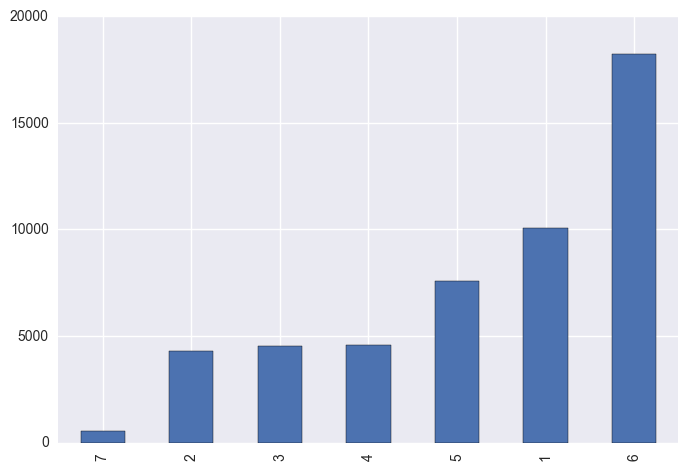

In [13]:
df_mask.last_trip_date.dt.month.value_counts().sort_values().plot(kind='bar')

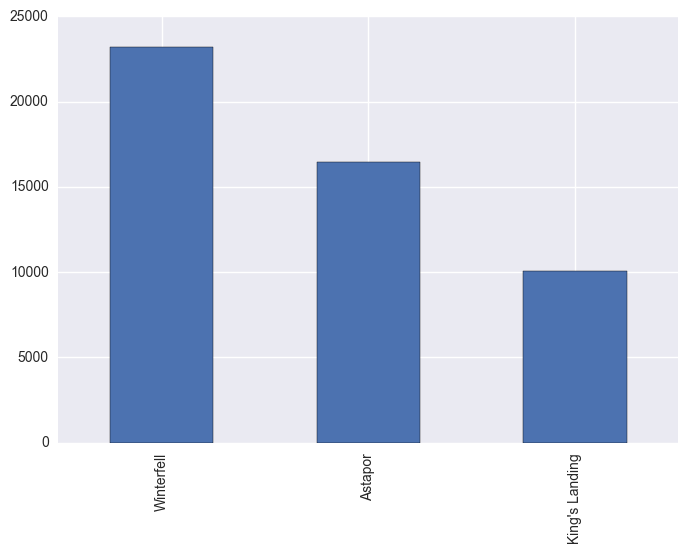

In [14]:
df_mask.city.value_counts().plot(kind='bar')

In [15]:
df['active_six'] = np.where(df.last_trip_date.dt.month >= 6, 1, 0)

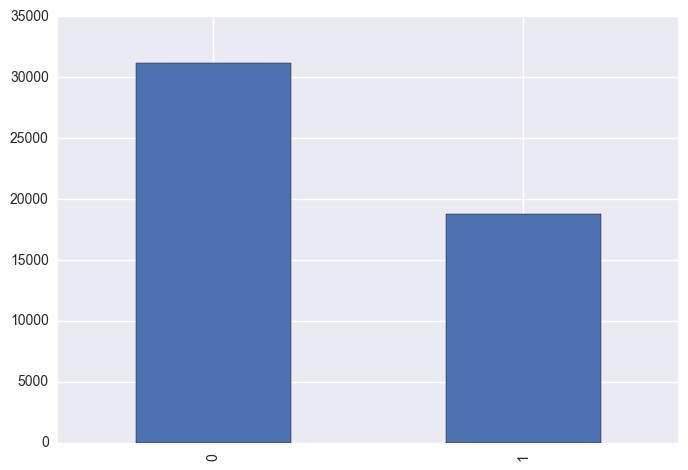

In [16]:
df.active_six.value_counts().plot(kind='bar')

In [56]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df_mask[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', \
                                                        'avg_surge', 'surge_pct', 'trips_in_first_30_days', \
                                                        'weekday_pct', 'is_Astapor', 'is_Kings', 'is_iPhone', \
                                                        'ultimate_black_user_binary']].values, 
                                                    df_mask.active_six.values, test_size=0.3)

In [68]:
model = LogisticRegression(max_iter=500, solver='sag', n_jobs=4)

In [69]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
model.coef_

array([[ -3.70567081e-02,  -1.66684814e-01,  -6.28663682e-02,
         -2.30387937e-01,   4.35712531e-03,   1.21050488e-01,
         -1.27142849e-04,  -4.90806836e-01,   1.20528425e+00,
          1.06513393e+00,   8.65429001e-01]])

In [71]:
preds = model.predict(x_train)

In [72]:
print(accuracy_score(preds, y_train))

0.718695315414


In [54]:
confusion_matrix(y_true=y_train, y_pred=preds)

array([[18532,  3173],
       [ 6635,  6519]])

In [55]:
# precision - true positives / (true positives + false positives)
# recall - true positives / (true positives + false negatives)
print(classification_report(y_true=y_train, y_pred=preds))

             precision    recall  f1-score   support

          0       0.74      0.85      0.79     21705
          1       0.67      0.50      0.57     13154

avg / total       0.71      0.72      0.71     34859



In [73]:
model2 = LogisticRegression(max_iter=500, solver='sag', n_jobs=2)
model2 = GridSearchCV(model2, param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}, scoring='accuracy', n_jobs=4, 
                     cv=StratifiedKFold(n_splits=5))
model2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [74]:
model2.cv_results_

{'mean_fit_time': array([ 1.25273719,  2.47491012,  2.87545996,  2.79878221,  2.41482706,
         2.37623267,  2.27446432]),
 'mean_score_time': array([ 0.00219831,  0.00090222,  0.0008945 ,  0.00090203,  0.00090208,
         0.00090203,  0.00069466]),
 'mean_test_score': array([ 0.66350153,  0.70810981,  0.7189535 ,  0.71875269,  0.718724  ,
         0.71866663,  0.71863794]),
 'mean_train_score': array([ 0.66359476,  0.70836798,  0.7190539 ,  0.71883158,  0.71870249,
         0.7186738 ,  0.71865946]),
 'param_C': masked_array(data = [0.0001 0.001 0.01 0.1 1 10 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}),
 'rank_test_score': array([7, 6, 1, 2, 3, 4, 5]),
 'split0_test_score': array([ 0.66752725,  0.71414228,  0.7207401 ,  0.72088353,  0.72016638,
         0.72016638,  0.72016638]),
 'split0_train_score': array([ 0.6626026

In [75]:
model3 = LogisticRegression(C=model2.best_params_['C'], max_iter=500, solver='sag', n_jobs=2)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)

In [76]:
accuracy_score(pred3, y_test)

0.71626506024096381

true negatives  | false positives
-----------------------------------
false negatives | true positives

In [77]:
confusion_matrix(y_true=y_test, y_pred=pred3)

array([[8048, 1278],
       [2961, 2653]])

In [79]:
print(classification_report(y_true=y_test, y_pred=pred3))

             precision    recall  f1-score   support

          0       0.73      0.86      0.79      9326
          1       0.67      0.47      0.56      5614

avg / total       0.71      0.72      0.70     14940



In [80]:
model3.coef_

array([[ -3.61476335e-02,  -1.50173892e-01,  -5.76060479e-02,
         -1.33650268e-01,   3.41909093e-03,   1.20351668e-01,
         -1.07018288e-04,  -4.77820198e-01,   1.10411082e+00,
          9.78431737e-01,   8.06840806e-01]])

In [89]:
var = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', \
       'weekday_pct', 'is_Astapor', 'is_Kings', 'is_iPhone', 'ultimate_black_user_binary']

In [103]:
coef = model3.coef_.tolist()

In [104]:
test = list(zip(var, coef))

In [105]:
test

[('avg_dist',
  [-0.03614763353295295,
   -0.15017389239793424,
   -0.05760604790291681,
   -0.13365026764759405,
   0.0034190909293344983,
   0.12035166844918532,
   -0.00010701828809008987,
   -0.4778201982722894,
   1.1041108190933384,
   0.9784317365018058,
   0.8068408060085014])]

In [106]:
model3.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [108]:
import statsmodels.api as sm

In [110]:
sm_model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.558196
         Iterations 6


In [112]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                34859
Model:                          Logit   Df Residuals:                    34848
Method:                           MLE   Df Model:                           10
Date:                Tue, 07 Mar 2017   Pseudo R-squ.:                  0.1578
Time:                        14:17:58   Log-Likelihood:                -19458.
converged:                       True   LL-Null:                       -23103.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0371      0.002    -14.895      0.000        -0.042    -0.032
x2            -0.2123      0.021    -10.068      0.000        -0.254    -0.171
x3            -0.0916      0.019     -4.784      0.0

In [122]:
print(x_train[1])

[  4.59   5.     4.     1.05   9.1    2.    36.4    0.     0.     1.     1.  ]


In [120]:
x_train_2 = np.delete(x_train, 6, 1)

In [123]:
print(x_train_2[1])

[ 4.59  5.    4.    1.05  9.1   2.    0.    0.    1.    1.  ]


In [125]:
sm_model_2 = sm.Logit(y_train, x_train_2).fit()
print(sm_model_2.summary())

Optimization terminated successfully.
         Current function value: 0.558201
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                34859
Model:                          Logit   Df Residuals:                    34849
Method:                           MLE   Df Model:                            9
Date:                Tue, 07 Mar 2017   Pseudo R-squ.:                  0.1578
Time:                        14:26:25   Log-Likelihood:                -19458.
converged:                       True   LL-Null:                       -23103.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0373      0.002    -15.029      0.000        -0.042    -0.032
x2            -0.2134      0.

In [127]:
print(np.exp(sm_model_2.params))

[ 0.96339505  0.80786074  0.91185605  0.69159917  1.00555845  1.12760448
  0.61161169  3.35214522  2.87828356  2.3731535 ]


In [129]:
var_2 = np.delete(var, 6, 0)

In [133]:
list(zip(var_2, np.exp(sm_model_2.params)))

[('avg_dist', 0.96339505101527545),
 ('avg_rating_by_driver', 0.80786074494527627),
 ('avg_rating_of_driver', 0.9118560452462382),
 ('avg_surge', 0.69159917138320803),
 ('surge_pct', 1.005558454386658),
 ('trips_in_first_30_days', 1.1276044784289312),
 ('is_Astapor', 0.61161169142724092),
 ('is_Kings', 3.352145216447961),
 ('is_iPhone', 2.8782835582567454),
 ('ultimate_black_user_binary', 2.3731535045323651)]